# DDoS Attack Detection Model using Decision Tree and Random Forest

This notebook demonstrates the creation of a hybrid model to detect DDoS (Distributed Denial of Service) attacks using Decision Tree and Random Forest algorithms. We'll use the NSL-KDD dataset for training and testing the model.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
import requests
from io import BytesIO
import gzip
from sklearn.preprocessing import label_binarize

In [2]:
# Load NSL-KDD dataset
data_url = "http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz"
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
           "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
           "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count", "srv_count",
           "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate",
           "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
           "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
           "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack_type"]

data = pd.read_csv(data_url, header=None, names=columns)
r = requests.get(data_url)
with gzip.open(BytesIO(r.content), 'rt') as f:
    data2 = pd.read_csv(f, header=None, names=columns)

In [3]:
# Preprocessing
# For simplicity, let's encode categorical features using one-hot encoding
data = pd.get_dummies(data, columns=["protocol_type", "service", "flag"])

In [4]:
# Define features and target
X = data.drop("attack_type", axis=1)
y = data["attack_type"]

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [7]:
# Train decision tree classifier
dt_classifier.fit(X_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

DecisionTreeClassifier(random_state=42)

In [8]:
# Initialize random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
# Train random forest classifier
rf_classifier.fit(X_train, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

RandomForestClassifier(random_state=42)

In [10]:
# Predictions
dt_predictions = dt_classifier.predict(X_test)
rf_predictions = rf_classifier.predict(X_test)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sp

In [11]:
# Evaluation
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')
    return accuracy, precision, recall, f1

In [12]:
# Evaluate Decision Tree
dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_predictions, y_test)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

In [13]:
# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_predictions, y_test)


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Pytho

In [14]:
# Print results
print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

Decision Tree Classifier:
Accuracy: 0.9995141946257781
Precision: 0.9995131146930074
Recall: 0.9995141946257781
F1 Score: 0.9995089851647028

Random Forest Classifier:
Accuracy: 0.9996761297505187
Precision: 0.99964537463008
Recall: 0.9996761297505187
F1 Score: 0.9996586047158045


In [15]:
print(data2.head())

   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

In [16]:
# Assuming the target variable is in the last column
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1]

In [17]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (494021, 41)
Shape of y: (494021,)


In [18]:
# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [19]:
# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_encoded, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

DecisionTreeClassifier()

In [20]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_encoded, y_train)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

RandomForestClassifier()

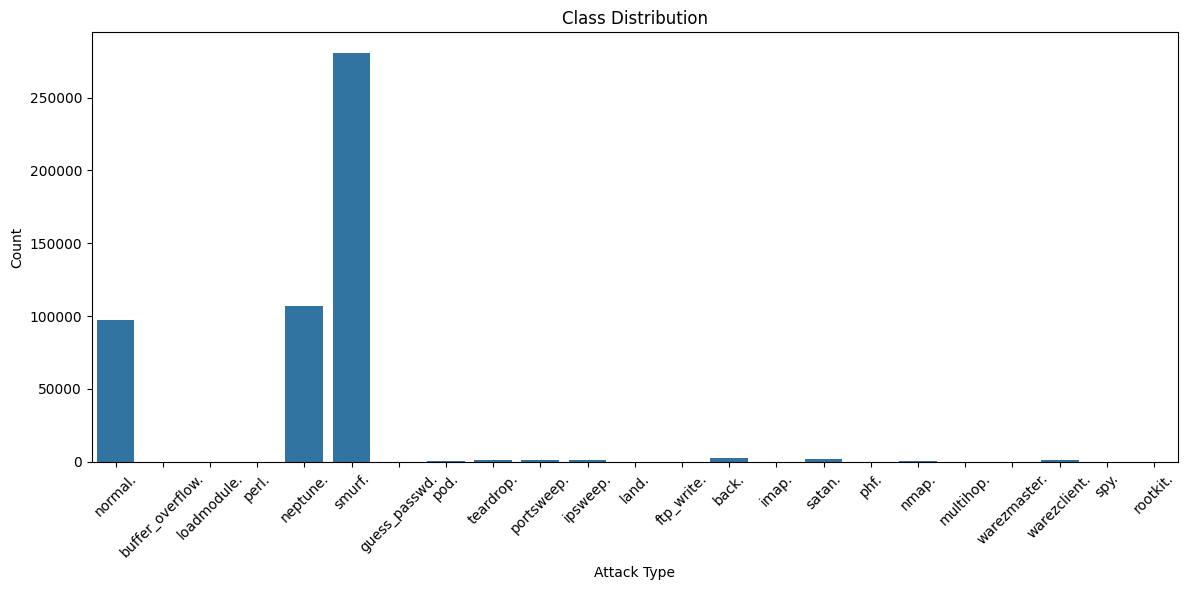

In [21]:
# Visualizations for class distribution, feature importance, confusion matrices, ROC curves, and precision-recall curves remain unchanged.
# 1. Class Distribution
plt.figure(figsize=(12, 6))  # Adjust figsize as needed
sns.countplot(x='attack_type', data=data2)
plt.title('Class Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


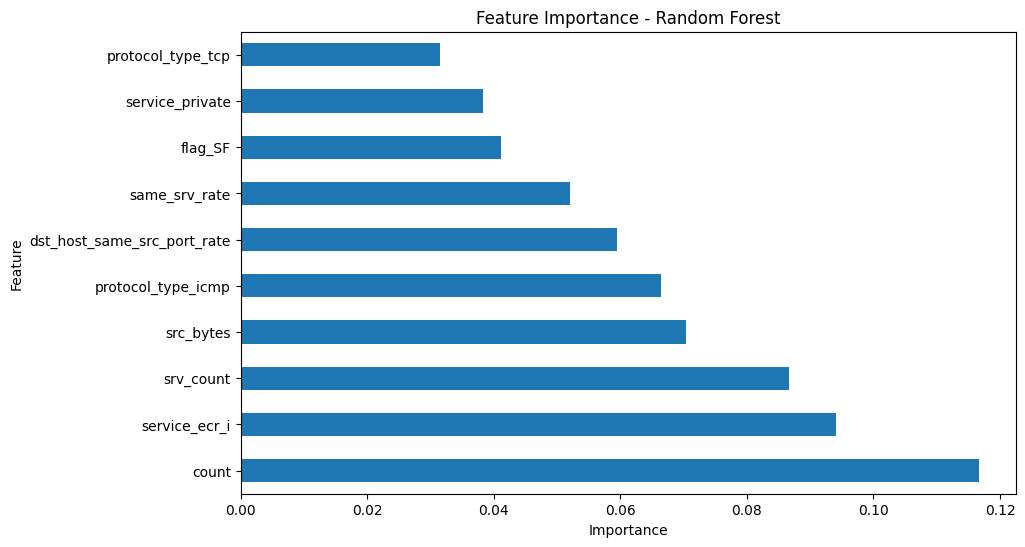

In [22]:
# Get the column names after one-hot encoding
encoded_columns = X_train_encoded.columns

# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_classifier.feature_importances_, index=encoded_columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [23]:
# One-hot encode categorical features for both training and testing data
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the columns in training and testing data match
# Get the column names after one-hot encoding
encoded_columns_train = X_train_encoded.columns
encoded_columns_test = X_test_encoded.columns

# Add missing columns in testing data (if any) and set their values to 0
missing_columns = set(encoded_columns_train) - set(encoded_columns_test)
for column in missing_columns:
    X_test_encoded[column] = 0

# Reorder columns in testing data to match the order in training data
X_test_encoded = X_test_encoded[encoded_columns_train]

# Now both training and testing data have the same preprocessing steps applied
# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_encoded, y_train)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_encoded, y_train)

# Rest of the code for plotting confusion matrix, feature importance, etc.
# Use X_test_encoded for prediction


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c

RandomForestClassifier()

In [24]:
# Check for missing values or NaNs in the testing data
missing_values = X_test_encoded.isnull().sum().sum()
if missing_values > 0:
    # Handle missing values as needed (e.g., imputation or removal)
    # For example, if there are missing values, you can impute them with the mean:
    X_test_encoded.fillna(X_test_encoded.mean(), inplace=True)


In [25]:
# Ensure that the target variable is in the correct format
y_test = y_test.values.ravel()  # Convert y_test to a 1D array if needed


In [26]:

# 1. Check Model Fitting
# Ensure that both models were trained successfully
print("Decision Tree Classifier Trained:", hasattr(dt_classifier, 'classes_'))
print("Random Forest Classifier Trained:", hasattr(rf_classifier, 'classes_'))

# 2. Inspect Input Data
# Print shape and sample of input data and target variable
print("X_test_encoded shape:", X_test_encoded.shape)
print("y_test shape:", y_test.shape)
print("Sample of X_test_encoded:", X_test_encoded.head())
print("Sample of y_test:", y_test[:10])

# 3. Validate Prediction Inputs
# Check if there are any missing values or NaNs in the input data
missing_values = X_test_encoded.isnull().sum().sum()
print("Missing values in X_test_encoded:", missing_values)

# Check if the target variable contains any NaNs
print("NaNs in y_test:", pd.isnull(y_test).sum() > 0)

# Predict using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_encoded)

# Predict using the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_encoded)




Decision Tree Classifier Trained: True
Random Forest Classifier Trained: True
X_test_encoded shape: (98805, 118)
y_test shape: (98805,)
Sample of X_test_encoded:         duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
317921         0       1032          0     0               0       0    0   
171422         0       1032          0     0               0       0    0   
312181         0       1032          0     0               0       0    0   
87346          0        345       5419     0               0       0    0   
57449          0          0          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
317921                  0          0                0  ...     False   
171422                  0          0                0  ...     False   
312181                  0          0                0  ...     False   
87346                   0          1                0  ...     False   
57449          

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sp

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


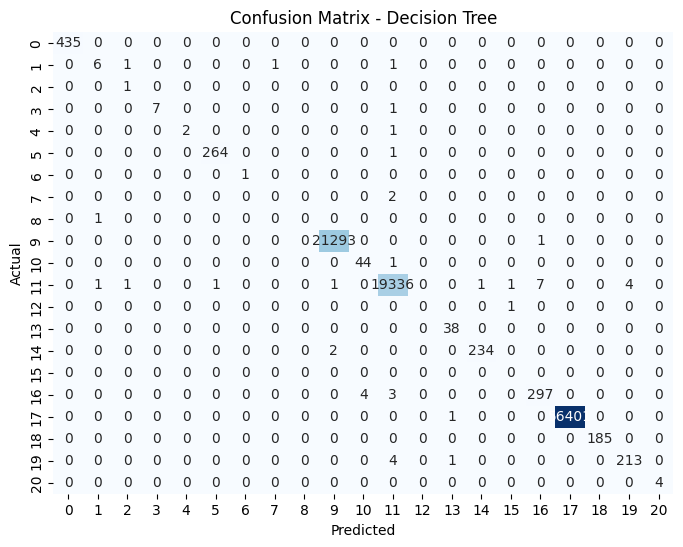

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


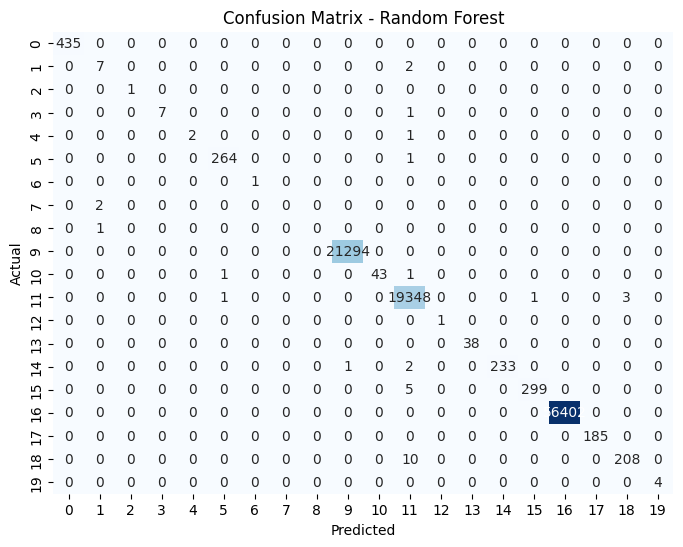

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(dt_classifier, X_test_encoded, y_test, title='Confusion Matrix - Decision Tree')
plot_confusion_matrix(rf_classifier, X_test_encoded, y_test, title='Confusion Matrix - Random Forest')

In [28]:
# Check the shape of X_test_encoded
print("Shape of X_test_encoded:", X_test_encoded.shape)

# Check the sample of X_test_encoded
print("Sample of X_test_encoded:", X_test_encoded.head())

# Predict using the Decision Tree classifier
y_pred_dt = dt_classifier.predict(X_test_encoded)

# Check the shape and unique values of the predicted labels
print("Shape of y_pred_dt:", y_pred_dt.shape)
print("Unique values in y_pred_dt:", np.unique(y_pred_dt))

# Check if there are any NaNs or missing values in the predicted labels
print("NaNs or missing values in y_pred_dt:", pd.isnull(y_pred_dt).sum())


Shape of X_test_encoded: (98805, 118)
Sample of X_test_encoded:         duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
317921         0       1032          0     0               0       0    0   
171422         0       1032          0     0               0       0    0   
312181         0       1032          0     0               0       0    0   
87346          0        345       5419     0               0       0    0   
57449          0          0          0     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
317921                  0          0                0  ...     False   
171422                  0          0                0  ...     False   
312181                  0          0                0  ...     False   
87346                   0          1                0  ...     False   
57449                   0          0                0  ...     False   

        flag_RSTO  flag_RSTOS0  flag_RST

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklear

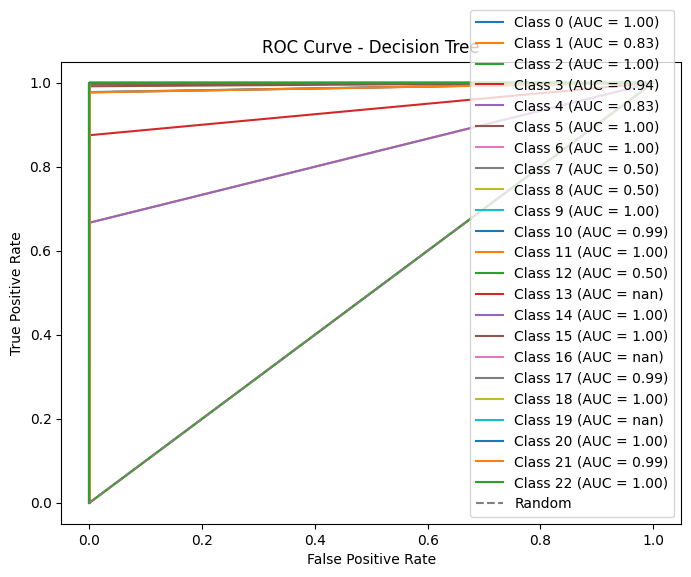

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklear

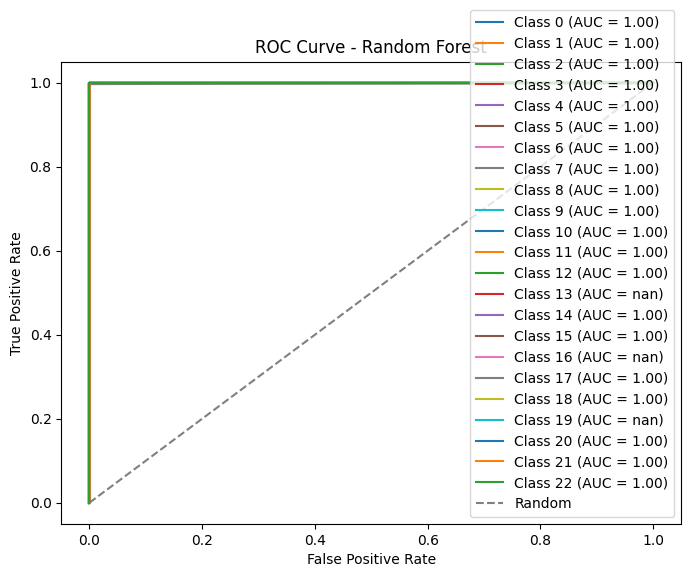

In [29]:


def plot_roc_curve_multiclass(model, X_test, y_test, title):
    y_proba = model.predict_proba(X_test)
    n_classes = y_proba.shape[1]
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curve for Decision Tree classifier
plot_roc_curve_multiclass(dt_classifier, X_test_encoded, y_test, title='ROC Curve - Decision Tree')

# Plot ROC curve for Random Forest classifier
plot_roc_curve_multiclass(rf_classifier, X_test_encoded, y_test, title='ROC Curve - Random Forest')

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\metrics

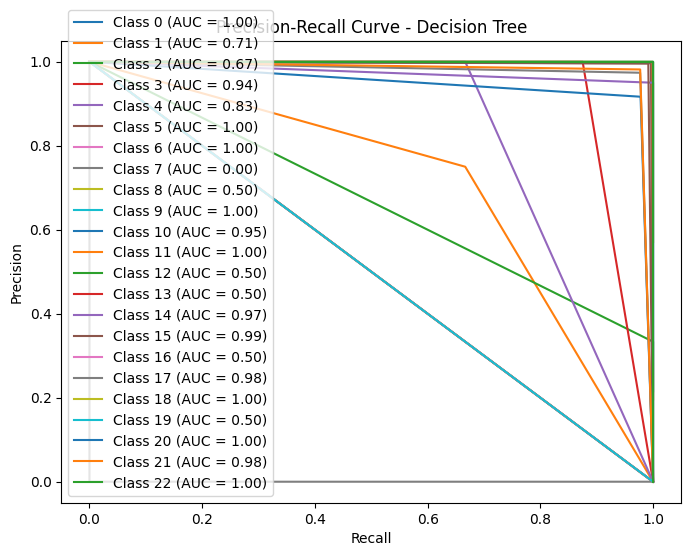

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Python\Python39\lib\site-packages\sklearn\metrics

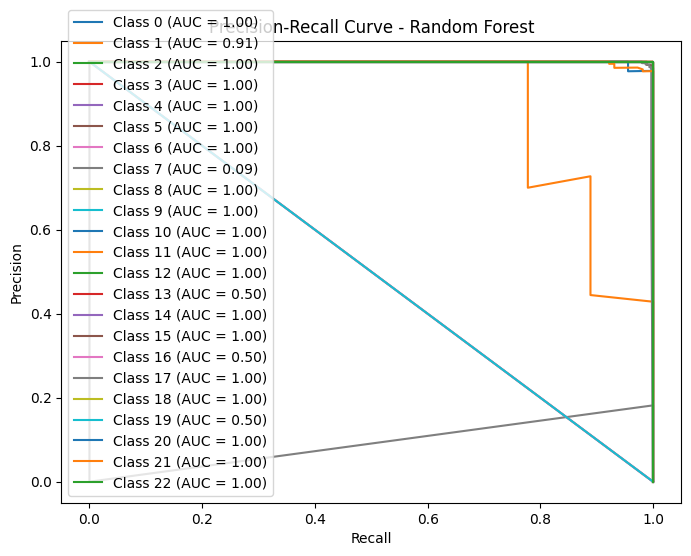

In [30]:
def plot_precision_recall_curve_multiclass(model, X_test, y_test, title):
    y_proba = model.predict_proba(X_test)
    n_classes = y_proba.shape[1]
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_proba[:, i])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f'Class {i} (AUC = {pr_auc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc='lower left')
    plt.show()

# Plot precision-recall curve for Decision Tree classifier
plot_precision_recall_curve_multiclass(dt_classifier, X_test_encoded, y_test, title='Precision-Recall Curve - Decision Tree')

# Plot precision-recall curve for Random Forest classifier
plot_precision_recall_curve_multiclass(rf_classifier, X_test_encoded, y_test, title='Precision-Recall Curve - Random Forest')
